In [1]:
import sys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
sys.path.append("..")

In [4]:
import py_utils.stimuli as stim_utils

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

In [7]:
n_steps = 100
params = stim_utils.stimulus_parameters(n_steps)
params["n_steps"] = n_steps

# Full 2x2 Matrix of Stimuli

In [ ]:
#%% Test 
fig, axes = plt.subplots(params["n_steps"], params["n_steps"], figsize=(params["n_steps"]*3,3*1.5*params["n_steps"]))
axes_flat = axes.flatten()
counter = 0
for i, radius in enumerate(params["d1val"]):  # np.linspace(0, 1, n)
    for j, fill_step in enumerate(params["fill_steps"]):
        axes_flat[counter] = stim_utils.draw_alien(radius, j, axes_flat[counter], params)
        counter += 1
plt.show()

_ = plt.subplots_adjust(wspace=0, hspace=0)

# Save Individual Stimuli

In [8]:
from functools import partial

In [9]:
def save_stimulus(idx_spiky, idx_belly, params):
    path_folder = "../experiments/2022-02-category-learning/stimuli/"
    nm_file = f"""stimulus[{idx_spiky + 1},{idx_belly + 1}]"""
    f, ax = plt.subplots(1, 1, figsize=(6, 10))
    radius = params["d1val"][idx_spiky]
    ax = stim_utils.draw_alien(radius, idx_belly, ax, params)
    plt.savefig(path_folder + nm_file)
    plt.close()

In [10]:
save_individual_stimulus = partial(save_stimulus, params=params)

In [11]:
df_cross = pd.merge(
    pd.Series(np.arange(0, params["n_steps"]), name="idx_spiky"),
    pd.Series(np.arange(0, params["n_steps"]), name="idx_belly"), 
    how="cross"
)
idxs_spiky = df_cross["idx_spiky"].to_list()
idxs_belly = df_cross["idx_belly"].to_list()

In [12]:
_ = list(map(save_individual_stimulus, idxs_spiky, idxs_belly))

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(6, 10))
radius = params["d1val"][29]
ax = stim_utils.draw_alien(radius, 90, ax, params)

In [8]:
plt.style.use("dark_background")

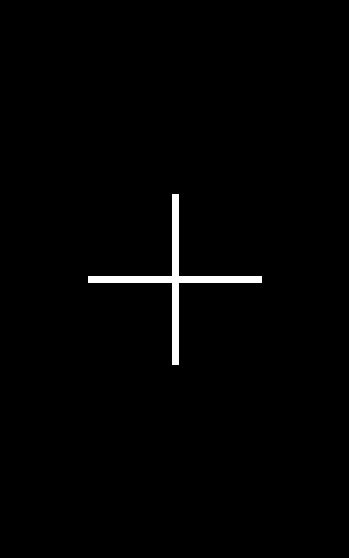

In [10]:
f, ax = plt.subplots(1, 1, figsize = (6, 10))
ax.plot([-1, 1], [0, 0], c="white", linewidth=7)
ax.plot([0, 0], [-.6, .6], c="white", linewidth=7)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.axis("off")
plt.savefig("../experiments/2022-02-category-learning/stimuli/fixcross.png")

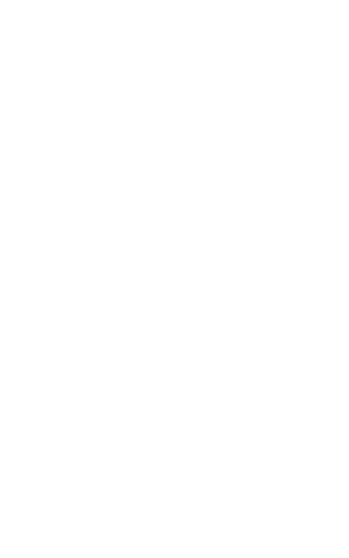

In [11]:
f, ax = plt.subplots(1, 1, figsize = (6, 10))
plt.axis("off")
plt.savefig("../experiments/2022-02-category-learning/stimuli/placeholder-white.png")

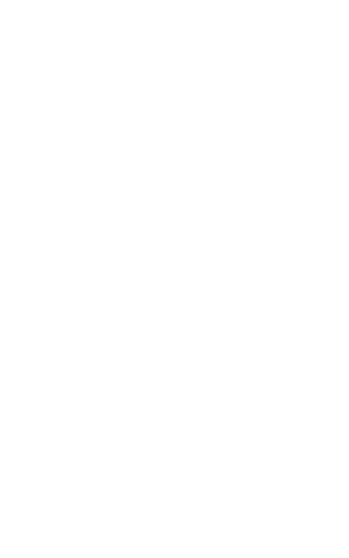

In [12]:
f, ax = plt.subplots(1, 1, figsize = (6, 10))
plt.style.use("dark_background")
ax.plot([0], [0], c="black")
plt.axis("off")
plt.savefig("../experiments/2022-02-category-learning/stimuli/mask.png")